In [6]:
import pandas as pd
import numpy as np
import sklearn as sk
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
df = pd.read_csv('C:\\Users\\Sepanta\\Desktop\\titanic\\kaggle-spaceship-titanic\\scientificProject\\dataset\\train.csv')

In [8]:
df

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


In [9]:
df  = df.drop(["PassengerId","Name","Cabin"], axis=1)

In [10]:
missing_rows = df.isnull().any(axis=1).sum()
print(f"Number of rows with at least one missing value: {missing_rows}")

Number of rows with at least one missing value: 1770


In [11]:
missing_percent = df.isnull().mean() * 100
print(missing_percent)
df.describe(),df.info

HomePlanet      2.312205
CryoSleep       2.496261
Destination     2.093639
Age             2.059128
VIP             2.335212
RoomService     2.082135
FoodCourt       2.105142
ShoppingMall    2.392730
Spa             2.105142
VRDeck          2.162660
Transported     0.000000
dtype: float64


(               Age   RoomService     FoodCourt  ShoppingMall           Spa  \
 count  8514.000000   8512.000000   8510.000000   8485.000000   8510.000000   
 mean     28.827930    224.687617    458.077203    173.729169    311.138778   
 std      14.489021    666.717663   1611.489240    604.696458   1136.705535   
 min       0.000000      0.000000      0.000000      0.000000      0.000000   
 25%      19.000000      0.000000      0.000000      0.000000      0.000000   
 50%      27.000000      0.000000      0.000000      0.000000      0.000000   
 75%      38.000000     47.000000     76.000000     27.000000     59.000000   
 max      79.000000  14327.000000  29813.000000  23492.000000  22408.000000   
 
              VRDeck  
 count   8505.000000  
 mean     304.854791  
 std     1145.717189  
 min        0.000000  
 25%        0.000000  
 50%        0.000000  
 75%       46.000000  
 max    24133.000000  ,
 <bound method DataFrame.info of      HomePlanet CryoSleep    Destination   Age

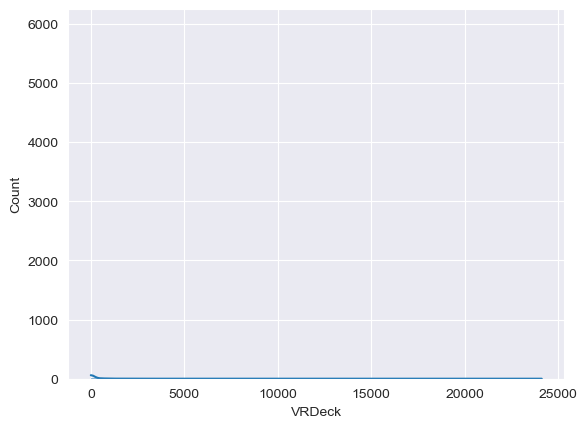

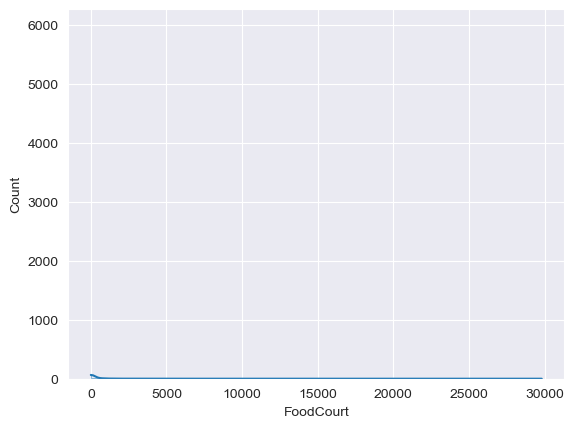

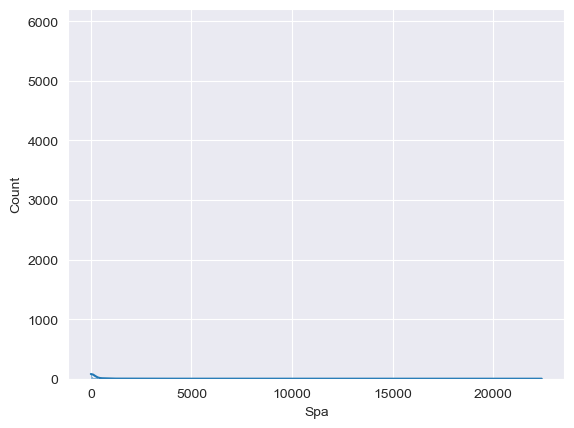

C:\Users\Sepanta\anaconda3\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


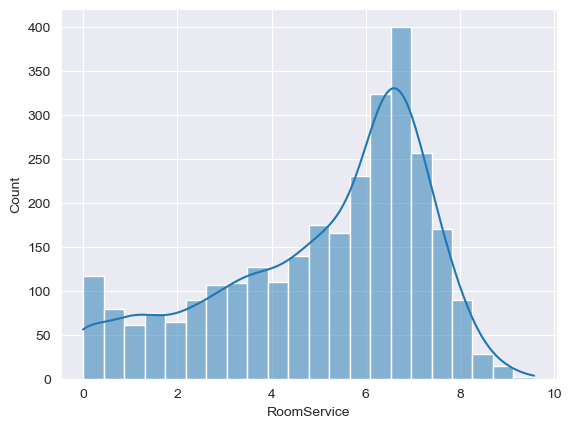

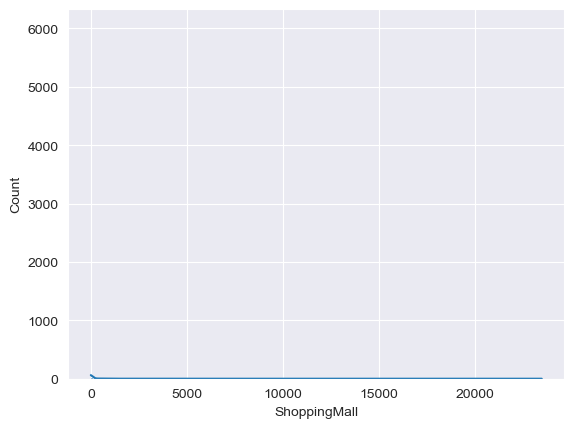

In [34]:
sns.histplot(df['VRDeck'], kde=True)
plt.show()
sns.histplot(df['FoodCourt'], kde=True)
plt.show()
sns.histplot(df['Spa'], kde=True)
plt.show()
sns.histplot(np.log(df['RoomService']), kde=True)
plt.show()
sns.histplot(df['ShoppingMall'], kde=True)
plt.show()

In [29]:
df

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,VRDeck_log,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e
0,0,39.0,0,0.0,0.0,0.0,0.0,0.0,0,0.000000,0,1,0,0,0,1
1,0,24.0,0,109.0,9.0,25.0,549.0,44.0,1,3.806662,1,0,0,0,0,1
2,0,58.0,1,43.0,3576.0,0.0,6715.0,49.0,0,3.912023,0,1,0,0,0,1
3,0,33.0,0,0.0,1283.0,371.0,3329.0,193.0,0,5.267858,0,1,0,0,0,1
4,0,16.0,0,303.0,70.0,151.0,565.0,2.0,1,1.098612,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,0,41.0,1,0.0,6819.0,0.0,1643.0,74.0,0,4.317488,0,1,0,1,0,0
8689,1,18.0,0,0.0,0.0,0.0,0.0,0.0,0,0.000000,1,0,0,0,1,0
8690,0,26.0,0,0.0,0.0,1872.0,1.0,0.0,1,0.000000,1,0,0,0,0,1
8691,0,32.0,0,0.0,1049.0,0.0,353.0,3235.0,0,8.082093,0,1,0,1,0,0


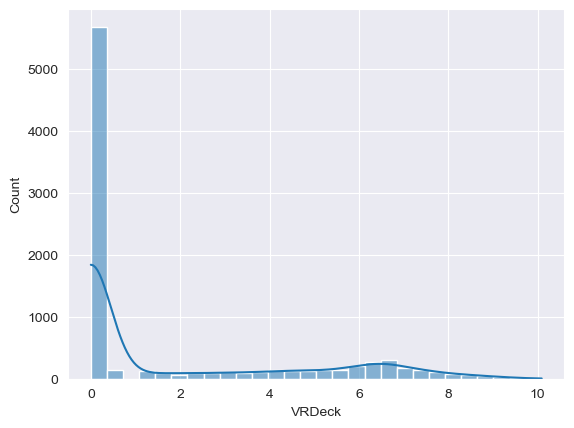

In [24]:
sns.histplot(np.log1p(df['VRDeck']), kde=True)
plt.show()

In [14]:
import numpy as np

df['VRDeck_log'] = np.log1p(df['VRDeck'])


<Axes: xlabel='Transported', ylabel='VRDeck'>

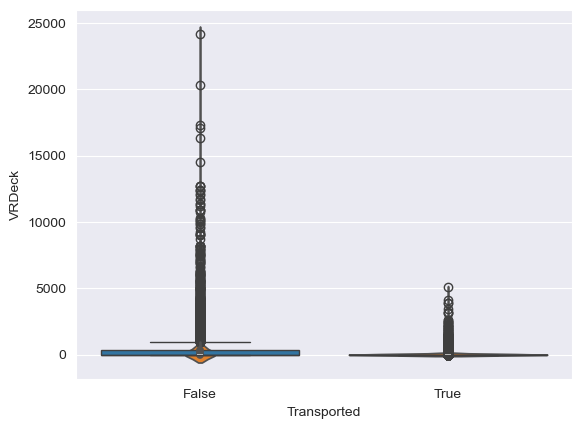

In [15]:
sns.boxplot(x='Transported', y='VRDeck', data=df)
sns.violinplot(x='Transported', y='VRDeck', data=df)



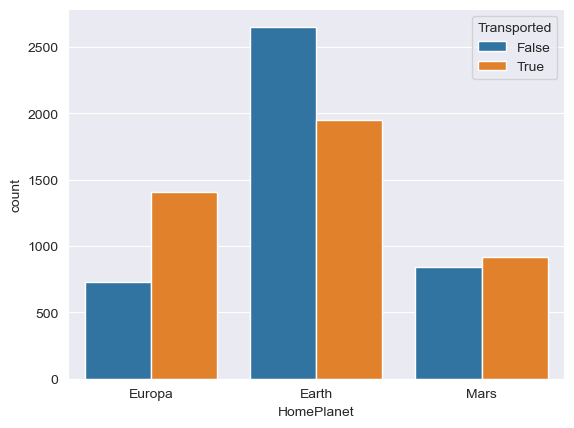

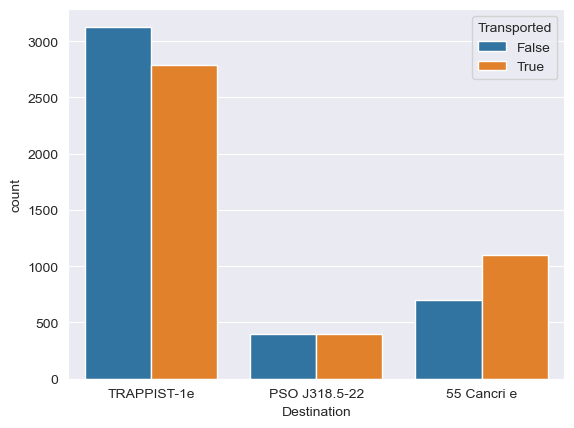

In [16]:
sns.countplot(x='HomePlanet', hue='Transported', data=df)
plt.show()
sns.countplot(x='Destination', hue='Transported', data=df)
plt.show()

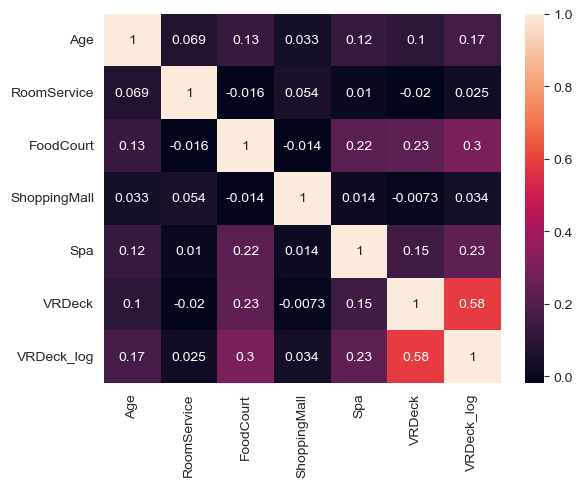

In [17]:
sns.heatmap(df.select_dtypes(include='number').corr(), annot=True)
plt.show()


In [18]:
df['Age'] = df['Age'].fillna(df['Age'].median())
df["ShoppingMall"] = df["ShoppingMall"].fillna(df["ShoppingMall"].mode()[0])
df["FoodCourt"] = df["FoodCourt"].fillna(df["FoodCourt"].mode()[0])
df["Spa"] = df["Spa"].fillna(df["Spa"].mode()[0])
df["VRDeck_log"] = df["VRDeck_log"].fillna(df["VRDeck_log"].mode()[0])
df["VRDeck"] = df["VRDeck"].fillna(df["VRDeck"].mode()[0])


df['VIP'] = df['VIP'].fillna(df['VIP'].mode()[0]).astype(bool)
df['CryoSleep'] = df['CryoSleep'].fillna(df['CryoSleep'].mode()[0]).astype(bool)

C:\Users\Sepanta\AppData\Local\Temp\ipykernel_5136\679300380.py:9: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['VIP'] = df['VIP'].fillna(df['VIP'].mode()[0]).astype(bool)
C:\Users\Sepanta\AppData\Local\Temp\ipykernel_5136\679300380.py:10: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['CryoSleep'] = df['CryoSleep'].fillna(df['CryoSleep'].mode()[0]).astype(bool)


In [26]:
df

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,VRDeck_log,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e
0,0,39.0,0,0.0,0.0,0.0,0.0,0.0,0,0.000000,0,1,0,0,0,1
1,0,24.0,0,109.0,9.0,25.0,549.0,44.0,1,3.806662,1,0,0,0,0,1
2,0,58.0,1,43.0,3576.0,0.0,6715.0,49.0,0,3.912023,0,1,0,0,0,1
3,0,33.0,0,0.0,1283.0,371.0,3329.0,193.0,0,5.267858,0,1,0,0,0,1
4,0,16.0,0,303.0,70.0,151.0,565.0,2.0,1,1.098612,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,0,41.0,1,0.0,6819.0,0.0,1643.0,74.0,0,4.317488,0,1,0,1,0,0
8689,1,18.0,0,0.0,0.0,0.0,0.0,0.0,0,0.000000,1,0,0,0,1,0
8690,0,26.0,0,0.0,0.0,1872.0,1.0,0.0,1,0.000000,1,0,0,0,0,1
8691,0,32.0,0,0.0,1049.0,0.0,353.0,3235.0,0,8.082093,0,1,0,1,0,0


In [20]:
df['HomePlanet'] = df['HomePlanet'].fillna('Earth')
df['Destination'] = df['Destination'].fillna('TRAPPIST-1e')
df['VIP'] = df['VIP'].fillna(False)
df['CryoSleep'] = df['CryoSleep'].fillna(False)

df['VIP'] = df['VIP'].astype(int)
df['CryoSleep'] = df['CryoSleep'].astype(int)

df = pd.get_dummies(df, columns=['HomePlanet', 'Destination'], drop_first=False)

In [21]:
df['VIP'] = df['VIP'].astype(int)
df['CryoSleep'] = df['CryoSleep'].astype(int)
df['HomePlanet_Earth'] = df['HomePlanet_Earth'].astype(int)
df['HomePlanet_Europa'] = df['HomePlanet_Europa'].astype(int)
df['HomePlanet_Mars'] = df['HomePlanet_Mars'].astype(int)
df['Destination_55 Cancri e'] = df['Destination_55 Cancri e'].astype(int)
df['Destination_PSO J318.5-22'] = df['Destination_PSO J318.5-22'].astype(int)
df['Destination_TRAPPIST-1e'] = df['Destination_TRAPPIST-1e'].astype(int)

df['Transported'] = df['Transported'].astype(int)

In [28]:
def summarize_outliers(df):
    numeric_cols = df.select_dtypes(include=np.number).columns
    summary = []
    
    for col in numeric_cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3-Q1
        lower_bound = Q1- 1.5*IQR
        upper_bound = Q3+ 1.5*IQR
        
        below = (df[col] < lower_bound).sum()
        above = (df[col] > upper_bound).sum()
        
        summary.append({
            'Feature': col,
            'Lower Bound': lower_bound,
            'Upper Bound': upper_bound,
            '# Below': below,
            '# Above': above,
            'Total Outliers': below + above
        })
        
    return pd.DataFrame(summary)

outlier_summary = summarize_outliers(df)
print(outlier_summary)


                      Feature  Lower Bound  Upper Bound  # Below  # Above  \
0                   CryoSleep    -1.500000      2.50000        0        0   
1                         Age    -5.500000     62.50000        0      162   
2                         VIP     0.000000      0.00000        0      199   
3                 RoomService   -70.500000    117.50000        0     1861   
4                   FoodCourt   -91.500000    152.50000        0     1916   
5                ShoppingMall   -33.000000     55.00000        0     1879   
6                         Spa   -79.500000    132.50000        0     1833   
7                      VRDeck   -60.000000    100.00000        0     1849   
8                 Transported    -1.500000      2.50000        0        0   
9                  VRDeck_log    -5.570358      9.28393        0       23   
10           HomePlanet_Earth    -1.500000      2.50000        0        0   
11          HomePlanet_Europa     0.000000      0.00000        0     2131   

In [37]:
df  = df.drop('VRDeck_log', axis=1)

training a random forest

In [38]:
df

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e
0,0,39.0,0,0.0,0.0,0.0,0.0,0.0,0,0,1,0,0,0,1
1,0,24.0,0,109.0,9.0,25.0,549.0,44.0,1,1,0,0,0,0,1
2,0,58.0,1,43.0,3576.0,0.0,6715.0,49.0,0,0,1,0,0,0,1
3,0,33.0,0,0.0,1283.0,371.0,3329.0,193.0,0,0,1,0,0,0,1
4,0,16.0,0,303.0,70.0,151.0,565.0,2.0,1,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,0,41.0,1,0.0,6819.0,0.0,1643.0,74.0,0,0,1,0,1,0,0
8689,1,18.0,0,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,1,0
8690,0,26.0,0,0.0,0.0,1872.0,1.0,0.0,1,1,0,0,0,0,1
8691,0,32.0,0,0.0,1049.0,0.0,353.0,3235.0,0,0,1,0,1,0,0


In [40]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

x = df.drop('Transported', axis=1)
y = df['Transported']

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

model = RandomForestClassifier(random_state=50,)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(accuracy_score(y_test, y_pred))


0.7763082231167338


In [ ]:
from xgboost import XGBClassifier

model = XGBClassifier(random_state=42, n_estimators=100, max_depth=5, learning_rate=0.05)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
